In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
dataset = pd.read_csv("survey.csv")

In [4]:
dataset.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [5]:
dataset.shape

(1259, 27)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

<Axes: xlabel='Country'>

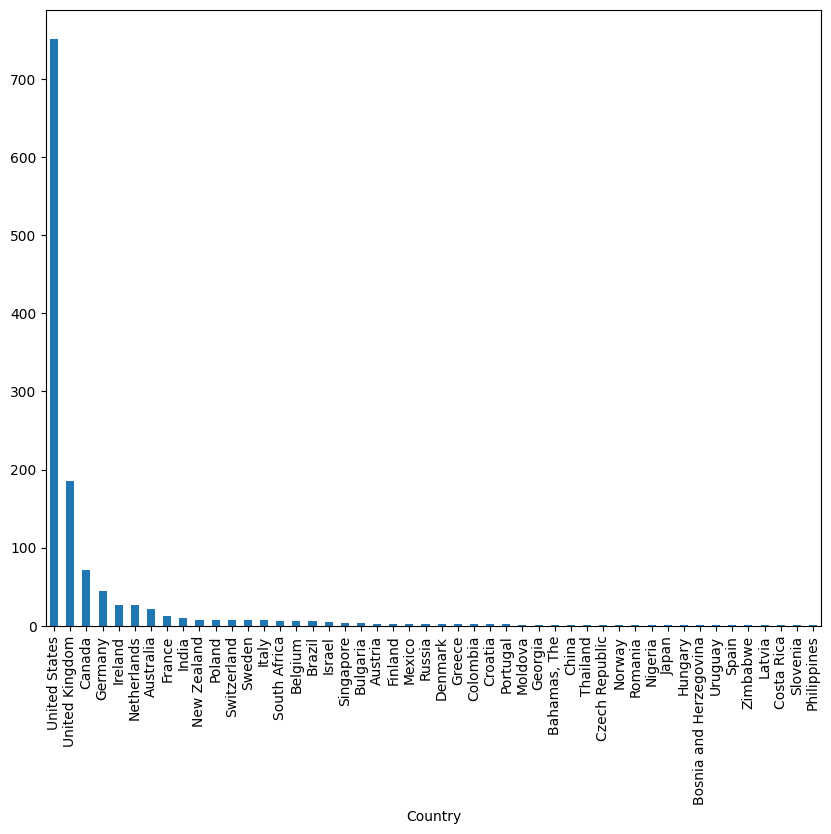

In [7]:
dataset['Country'].value_counts().plot(kind='bar', figsize=(10,8))

In [8]:
dataset.drop(['Country', 'state', 'Timestamp', 'comments'], axis=1, inplace=True) 

## Filling the Null values in the dataset

In [9]:
dataset.isnull().sum()

Age                            0
Gender                         0
self_employed                 18
family_history                 0
treatment                      0
work_interfere               264
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
dtype: int64

In [10]:
dataset['self_employed'].value_counts()

self_employed
No     1095
Yes     146
Name: count, dtype: int64

In [11]:
dataset['self_employed'].fillna('NO', inplace=True)

C:\Users\jaipr\AppData\Local\Temp\ipykernel_16372\4021785835.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['self_employed'].fillna('NO', inplace=True)


In [12]:
dataset['work_interfere'].value_counts()

work_interfere
Sometimes    465
Never        213
Rarely       173
Often        144
Name: count, dtype: int64

In [13]:
dataset['work_interfere'].fillna('N/A', inplace=True)

C:\Users\jaipr\AppData\Local\Temp\ipykernel_16372\2349953862.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['work_interfere'].fillna('N/A', inplace=True)


In [14]:
dataset.isnull().sum()

Age                          0
Gender                       0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

# Cleaning the dataset

<Axes: xlabel='Age'>

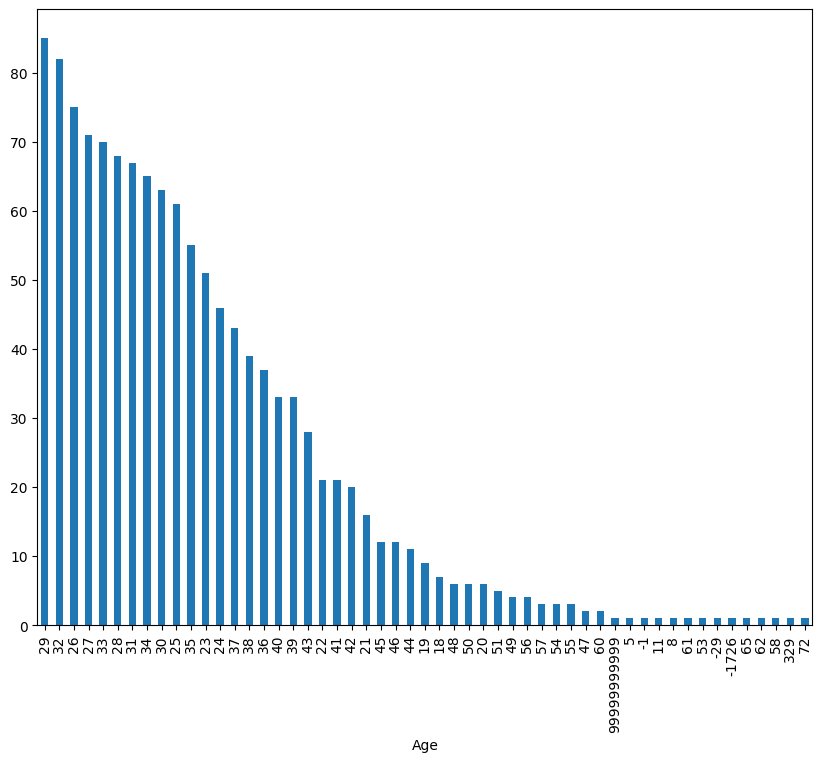

In [15]:
dataset['Age'].value_counts().plot(kind='bar', figsize=(10,8))

In [16]:
dataset.drop(dataset[(dataset['Age']>60) | (dataset['Age']<18)].index, inplace=True)

# Remapping the Labels

In [19]:
dataset['Gender'].replace(['Male ', 'male', 'M', 'm', 'Male', 'Cis Male', 'Man', 'cis male', 'Mail', 'Male-ish', 'Male (CIS)', 'Cis Man', 'msle',
                           'Malr', 'Mal', 'maile', 'Make'], 'Male', inplace=True)

dataset['Gender'].replace(['Female ', 'female', 'F', 'f', 'Woman', 'Female', 'femail', 'Cis Female', 'cis-female/femme', 'Femake', 'Female (cis)',
                           'woman'], 'Female', inplace=True)

dataset['Gender'].replace(['Female (trans)', 'queer/she/they', 'non-binary', 'fluid', 'queer', 'Androgyne', 'Trans-female', 'male leaning androgynous',
                           'Agender', 'A little about you', 'Nah', 'All', 'ostensibly male, unsure what that really means', 'Genderqueer', 'Enby',
                           'p', 'Neuter', 'something kinda male?', 'Guy (-ish) ^_^', 'Trans woman'], 'Non-binary', inplace=True)

<Axes: xlabel='Gender'>

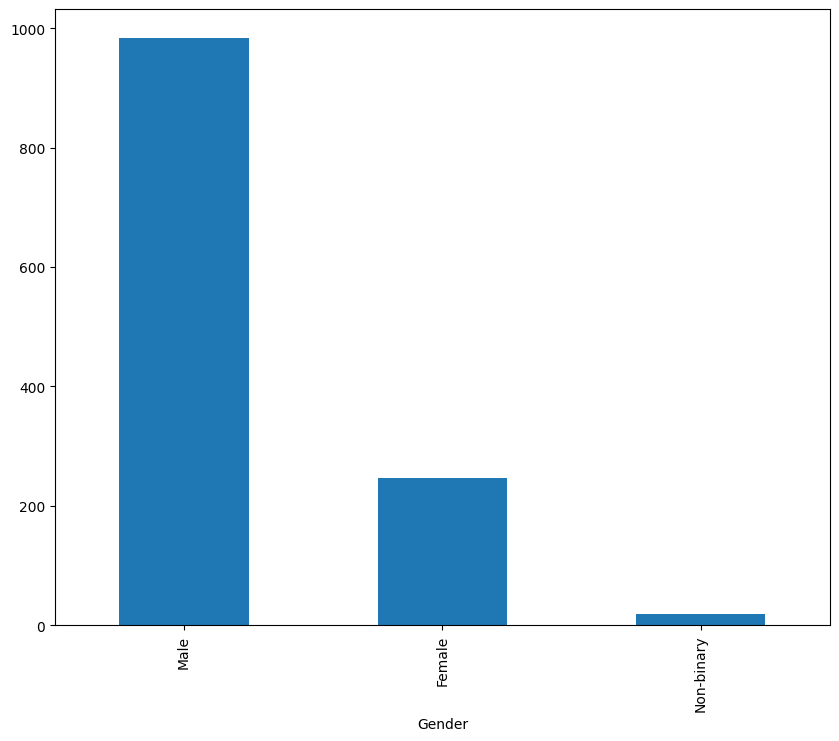

In [20]:
dataset['Gender'].value_counts().plot(kind='bar', figsize=(10,8))

# Visualizing the dependence of treatment on each feature

C:\Users\jaipr\AppData\Local\Temp\ipykernel_16372\1945376689.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(dataset['Age'])


<Axes: xlabel='Age', ylabel='Density'>

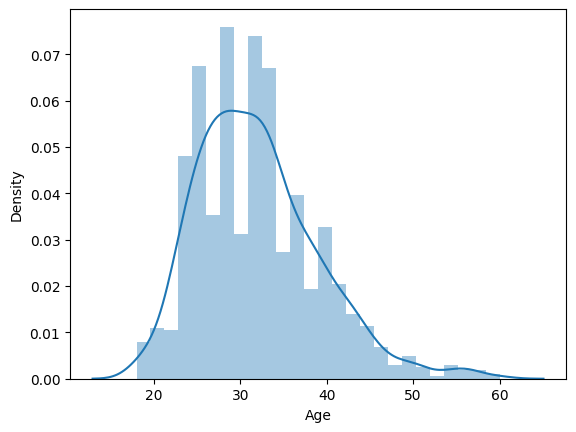

In [21]:
sb.distplot(dataset['Age'])

Text(0.5, 1.0, 'Employment Type')

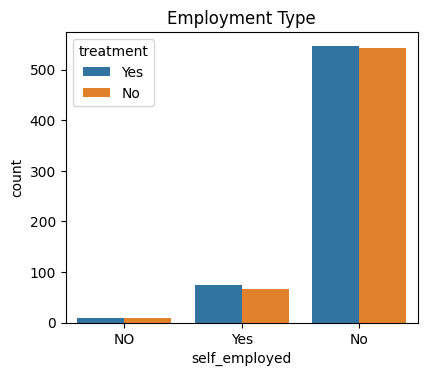

In [22]:
plt.figure(figsize=(10, 40))
plt.subplot(9, 2, 1)
sb.countplot(x="self_employed", hue="treatment", data=dataset)
plt.title('Employment Type')

Text(0.5, 1.0, 'Family History')

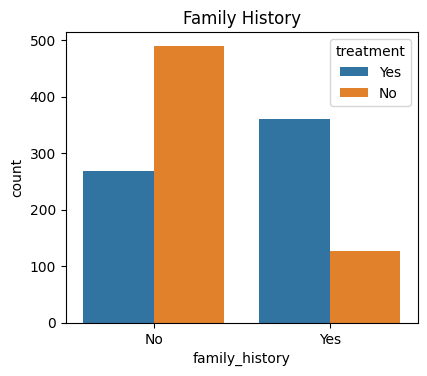

In [23]:
plt.figure(figsize=(10, 40))
plt.subplot(9, 2, 1)
sb.countplot(x="family_history", hue="treatment", data=dataset)
plt.title('Family History')

Text(0.5, 1.0, 'work_interfere')

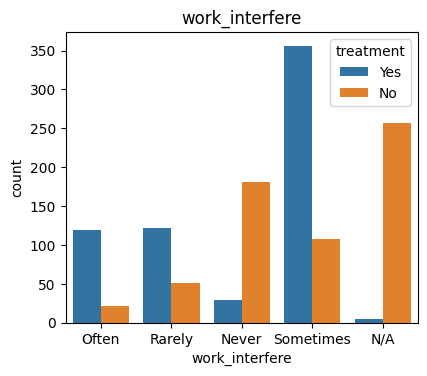

In [24]:
plt.figure(figsize=(10, 40))
plt.subplot(9, 2, 1)
sb.countplot(x="work_interfere", hue="treatment", data=dataset)
plt.title('work_interfere')

Text(0.5, 1.0, 'remote_work')

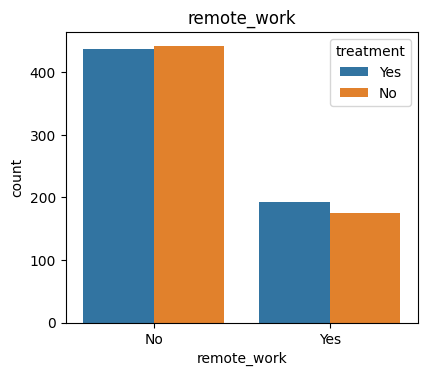

In [25]:
plt.figure(figsize=(10, 40))
plt.subplot(9, 2, 1)
sb.countplot(x="remote_work", hue="treatment", data=dataset)
plt.title('remote_work')

Text(0.5, 1.0, 'Company')

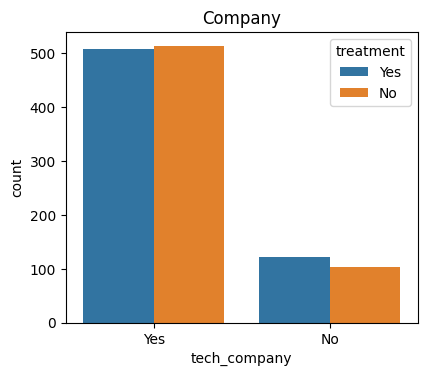

In [26]:
plt.figure(figsize=(10, 40))
plt.subplot(9, 2, 1)
sb.countplot(x="tech_company", hue="treatment", data=dataset)
plt.title('Company')

Text(0.5, 1.0, 'benefits')

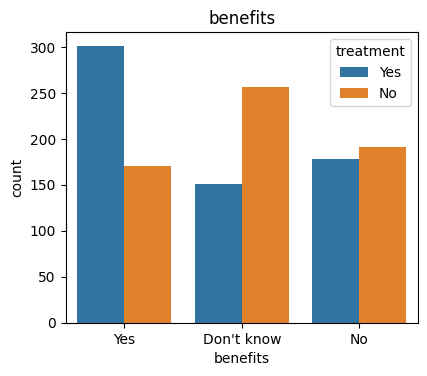

In [27]:
plt.figure(figsize=(10, 40))
plt.subplot(9, 2, 1)
sb.countplot(x="benefits", hue="treatment", data=dataset)
plt.title('benefits')

Text(0.5, 1.0, 'care_options')

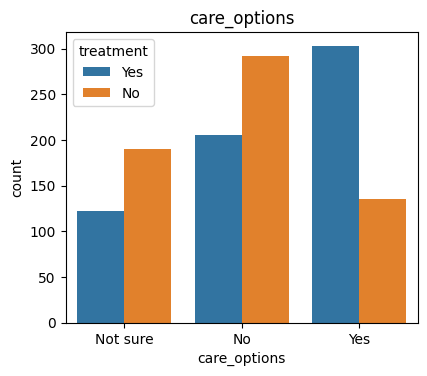

In [28]:
plt.figure(figsize=(10, 40))
plt.subplot(9, 2, 1)
sb.countplot(x="care_options", hue="treatment", data=dataset)
plt.title('care_options')

Text(0.5, 1.0, 'Equalimp[ortance to Mental and Physical Health]')

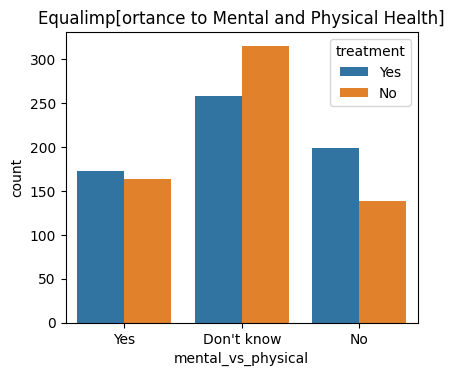

In [29]:
plt.figure(figsize=(10, 40))
plt.subplot(9, 2, 8)
sb.countplot(x="mental_vs_physical", hue="treatment", data=dataset)
plt.title('Equalimp[ortance to Mental and Physical Health]')

Text(0.5, 1.0, 'Wellness Program')

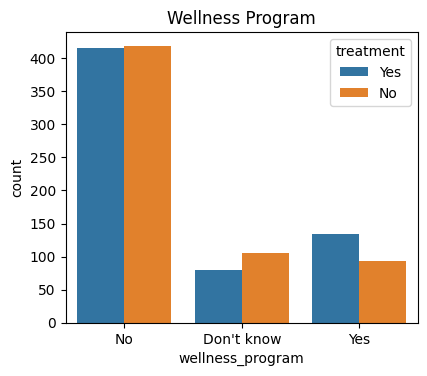

In [30]:
plt.figure(figsize=(10, 40))
plt.subplot(9, 2, 9)
sb.countplot(x="wellness_program", hue="treatment", data=dataset)
plt.title('Wellness Program')

Text(0.5, 1.0, 'anonymity')

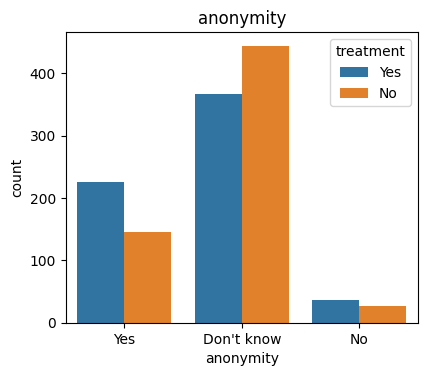

In [31]:
plt.figure(figsize=(10, 40))
plt.subplot(9, 2, 10)
sb.countplot(x="anonymity", hue="treatment", data=dataset)
plt.title('anonymity')

Text(0.5, 1.0, 'leave')

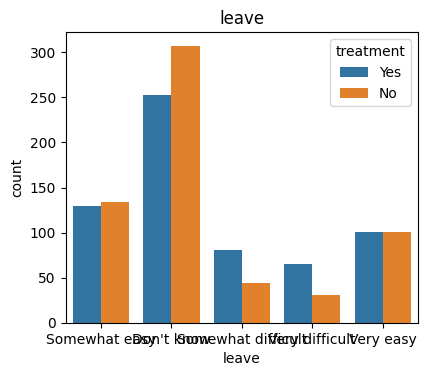

In [32]:
plt.figure(figsize=(10, 40))
plt.subplot(9, 2, 11)
sb.countplot(x="leave", hue="treatment", data=dataset)
plt.title('leave')

Text(0.5, 1.0, 'Mental Health Consequence')

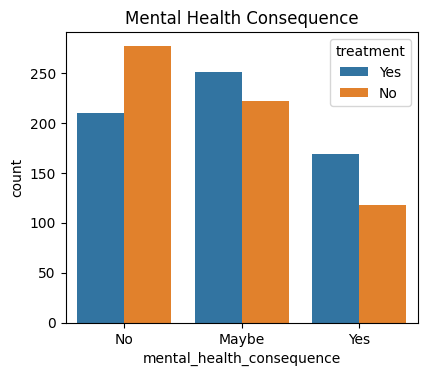

In [33]:
plt.figure(figsize=(10, 40))
plt.subplot(9, 2, 12)
sb.countplot(x="mental_health_consequence", hue="treatment", data=dataset)
plt.title('Mental Health Consequence')

Text(0.5, 1.0, 'Physical Health Consequence')

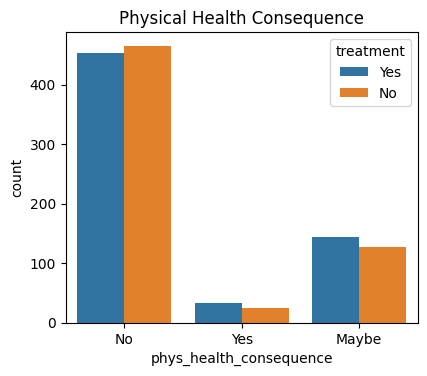

In [34]:
plt.figure(figsize=(10, 40))
plt.subplot(9, 2, 13)
sb.countplot(x="phys_health_consequence", hue="treatment", data=dataset)
plt.title('Physical Health Consequence')

Text(0.5, 1.0, 'Discussion with Coworkers')

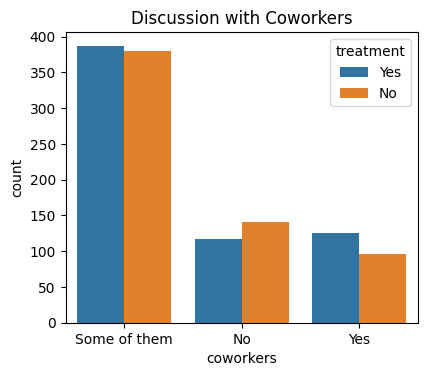

In [35]:
plt.figure(figsize=(10, 40))
plt.subplot(9, 2, 14)
sb.countplot(x="coworkers", hue="treatment", data=dataset)
plt.title('Discussion with Coworkers')

Text(0.5, 1.0, 'Discussion with Supervisor')

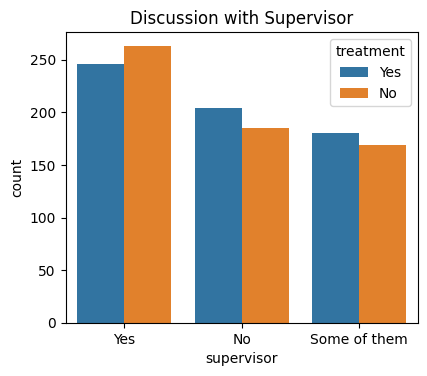

In [36]:
plt.figure(figsize=(10, 40))
plt.subplot(9, 2, 15)
sb.countplot(x="supervisor", hue="treatment", data=dataset)
plt.title('Discussion with Supervisor')

Text(0.5, 1.0, 'Discussion with Interviewer')

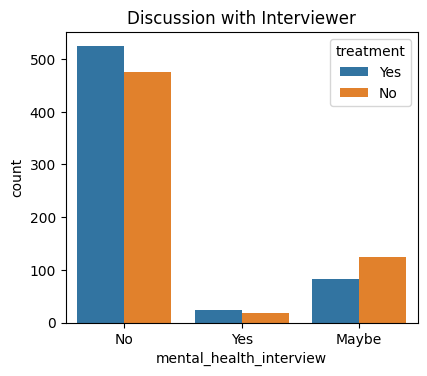

In [37]:
plt.figure(figsize=(10, 40))
plt.subplot(9, 2, 16)
sb.countplot(x="mental_health_interview", hue="treatment", data=dataset)
plt.title('Discussion with Interviewer')

Text(0.5, 1.0, 'Discussion with Interviewer')

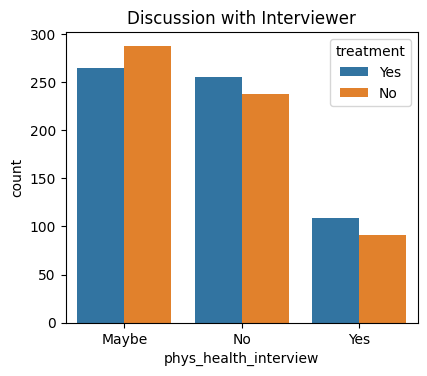

In [38]:
plt.figure(figsize=(10, 40))
plt.subplot(9, 2, 17)
sb.countplot(x="phys_health_interview", hue="treatment", data=dataset)
plt.title('Discussion with Interviewer')

Text(0.5, 1.0, 'Consequence after Disclousre')

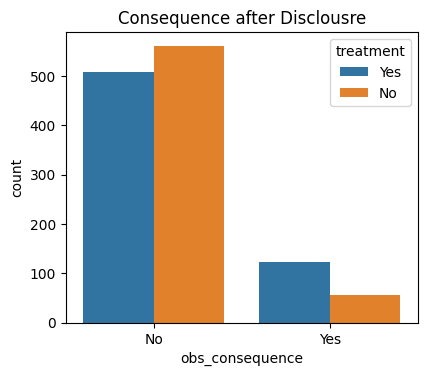

In [39]:
plt.figure(figsize=(10, 40))
plt.subplot(9, 2, 18)
sb.countplot(x="obs_consequence", hue="treatment", data=dataset)
plt.title('Consequence after Disclousre')

In [40]:
dataset.describe(include='all')

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
count,1247.000000,1247,1247,1247,1247,1247,1247,1247,1247,1247,...,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247
unique,NaN,3,3,2,2,5,6,2,2,3,...,3,5,3,3,3,3,3,3,3,2
top,NaN,Male,No,No,Yes,Sometimes,6-25,No,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,No,Maybe,Don't know,No
freq,NaN,983,1089,759,630,463,288,879,1023,471,...,811,560,487,918,767,509,1000,553,573,1068
mean,31.971131,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,7.052598,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,27.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,36.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
x = dataset.drop('treatment', axis=1)
y = dataset['treatment']

# Encoding the data

In [42]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

In [55]:
ct = ColumnTransformer([('oe', OrdinalEncoder(), ['Gender', 'self_employed', 'family_history', 'work_interfere', 'no_employees', 'remote_work', 
                                                  'tech_company', 'benefits', 'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave',
                                                  'mental_health_consequence', 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 
                                                  'phys_health_interview', 'mental_vs_physical', 'obs_consequence'])], remainder='passthrough')

In [56]:
x = ct.fit_transform(x)

In [57]:
x

array([[ 0.,  0.,  0., ...,  2.,  0., 37.],
       [ 1.,  0.,  0., ...,  0.,  0., 44.],
       [ 1.,  0.,  0., ...,  1.,  0., 32.],
       ...,
       [ 1.,  1.,  1., ...,  1.,  0., 34.],
       [ 0.,  1.,  0., ...,  1.,  0., 46.],
       [ 1.,  1.,  1., ...,  0.,  0., 25.]])

In [177]:
x.shape

(1247, 22)

In [59]:
le = LabelEncoder()
y = le.fit_transform(y)

In [60]:
y

array([1, 0, 0, ..., 1, 0, 1])

# Saving the feature values

In [158]:
import joblib
joblib.dump(ct, 'feature_values')

['feature_values']

In [159]:
ct_loaded = joblib.load('feature_values')
ct_loaded

ColumnTransformer(remainder='passthrough',
                  transformers=[('oe', OrdinalEncoder(),
                                 ['Gender', 'self_employed', 'family_history',
                                  'work_interfere', 'no_employees',
                                  'remote_work', 'tech_company', 'benefits',
                                  'care_options', 'wellness_program',
                                  'seek_help', 'anonymity', 'leave',
                                  'mental_health_consequence',
                                  'phys_health_consequence', 'coworkers',
                                  'supervisor', 'mental_health_interview',
                                  'phys_health_interview', 'mental_vs_physical',
                                  'obs_consequence'])])

# Splitting the data

In [183]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [184]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((872, 22), (375, 22), (872,), (375,))

# Model Comparison

In [185]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, confusion_matrix, classification_report, auc

In [186]:
model_dict = {}
model_dict['Logistic Regression'] = LogisticRegression(solver='liblinear', random_state=42)
model_dict['KNN Classifier'] = KNeighborsClassifier()
model_dict['Decision Tree Classifier'] = DecisionTreeClassifier(random_state=42)
model_dict['Random Forest Classifier'] = RandomForestClassifier(n_estimators=300, criterion='entropy', random_state=42)
model_dict['AdaBoost Classifier'] = AdaBoostClassifier(random_state=42)
model_dict['Gradient Boosting Classifier'] = GradientBoostingClassifier(random_state=42)

In [187]:
def model_test(x_train, x_test, y_train, y_test, model, model_name):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("------------------------------x------------------------------")
    print('Model Name:', model_name)
    print('Accuracy:', accuracy)
    
    print()

In [188]:
for model_name, model in model_dict.items():
    model_test(x_train, x_test, y_train, y_test, model, model_name)

------------------------------x------------------------------
Model Name: Logistic Regression
Accuracy: 0.7733333333333333

------------------------------x------------------------------
Model Name: KNN Classifier
Accuracy: 0.7493333333333333

------------------------------x------------------------------
Model Name: Decision Tree Classifier
Accuracy: 0.744

------------------------------x------------------------------
Model Name: Random Forest Classifier
Accuracy: 0.8186666666666667

------------------------------x------------------------------
Model Name: AdaBoost Classifier
Accuracy: 0.784



C:\Users\jaipr\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


------------------------------x------------------------------
Model Name: Gradient Boosting Classifier
Accuracy: 0.7893333333333333



# Logistic Regression

In [69]:
model_1 = LogisticRegression()
model_1.fit(x_train, y_train)

C:\Users\jaipr\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [71]:
y_pred_1 = model_1.predict(x_test)

In [72]:
accuracy_score(y_test, y_pred_1)

0.7733333333333333

In [134]:
confusion_matrix(y_test, y_pred_1)

array([[124,  44],
       [ 41, 166]], dtype=int64)

In [136]:
cr = classification_report(y_test, y_pred_1)
print(cr)

              precision    recall  f1-score   support

           0       0.75      0.74      0.74       168
           1       0.79      0.80      0.80       207

    accuracy                           0.77       375
   macro avg       0.77      0.77      0.77       375
weighted avg       0.77      0.77      0.77       375



In [140]:
roc_auc = roc_auc_score(y_test, y_pred_1)

In [139]:
roc_curve(y_test, y_pred_1)

(array([0.        , 0.26190476, 1.        ]),
 array([0.        , 0.80193237, 1.        ]),
 array([inf,  1.,  0.]))

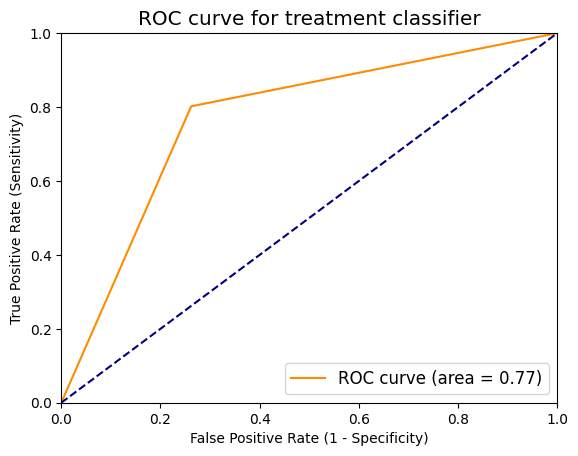

In [141]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_1)
if True:
    plt.figure()
    
    plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.rcParams['font.size'] = 12
    plt.title('ROC curve for treatment classifier')
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.legend(loc="lower right")
    plt.show()

# Random Forest Classifier

In [144]:
model_2 = RandomForestClassifier(n_estimators=300, criterion='entropy', random_state=42)

In [145]:
model_2.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=300, random_state=42)

In [146]:
y_pred_2 = model_2.predict(x_test)

In [147]:
accuracy_score(y_test, y_pred_2)

0.8186666666666667

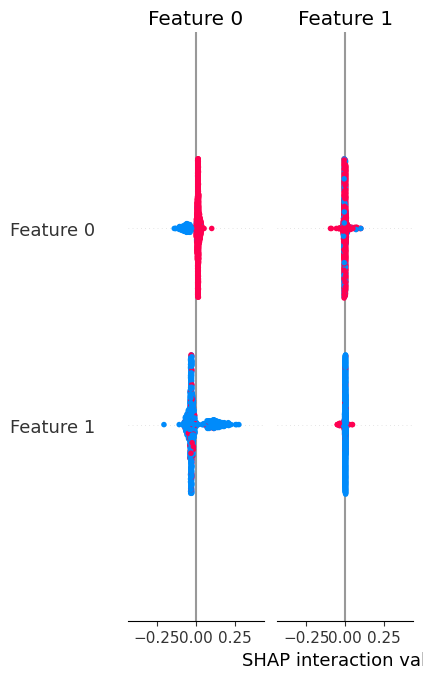

In [151]:
import shap

# Create SHAP explainer and compute SHAP values
explainer = shap.Explainer(model_2)
shap_values = explainer(x_train)

# Plot feature importance
shap.summary_plot(shap_values, x_train)

In [152]:
cr = classification_report(y_test, y_pred_2)
print(cr)

              precision    recall  f1-score   support

           0       0.84      0.73      0.78       168
           1       0.80      0.89      0.84       207

    accuracy                           0.82       375
   macro avg       0.82      0.81      0.81       375
weighted avg       0.82      0.82      0.82       375



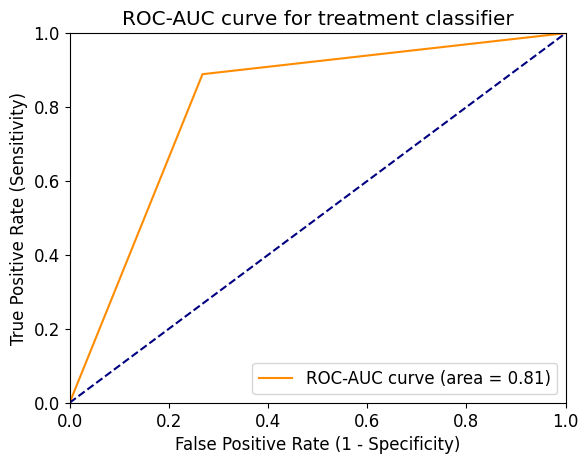

In [154]:
roc_auc = roc_auc_score(y_test, y_pred_2)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_2)
if True:
    plt.figure()
    
    plt.plot(fpr, tpr, color='darkorange', label='ROC-AUC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.rcParams['font.size'] = 12
    plt.title('ROC-AUC curve for treatment classifier')
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.legend(loc="lower right")
    plt.show()

## Saving the model

In [155]:
import pickle

In [156]:
file_name = "mental_health_prediction_model"
pickle.dump(model_2, open(file_name, "wb"))